In [1]:
import os
import gym
import imageio
import pybullet_envs
import PIL.Image
import pybullet
import pybullet_data

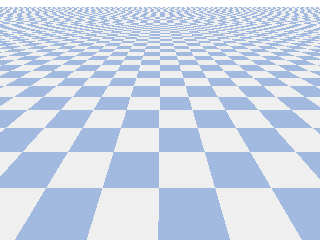

In [4]:
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.networks import actor_distribution_network
from tf_agents.replay_buffers import tf_uniform_replay_buffer
env = gym.make('HumanoidBulletEnv-v0')
# env.render(mode='human')
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))



In [ ]:
done = False
video_filename = 'humanoid_gym.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
    while not done:
        state, reward, done, info = env.step(env.action_space.sample())
        video.append_data(env.render(mode='rgb_array'))
env.reset()

In [4]:
# Pybullet testing environment
import PIL.Image
import os
# Important: pybullet should be charged only once !!
from tf_agents.environments import suite_pybullet, parallel_py_environment
from tf_agents.environments import tf_py_environment
from tf_agents.trajectories.trajectory import Trajectory
from tf_agents.networks import actor_distribution_network
from tf_agents.drivers import dynamic_episode_driver
from tf_agents.policies import random_tf_policy
import tensorflow as tf

/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


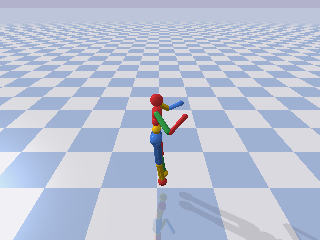

In [5]:
py_env = suite_pybullet.load('HumanoidBulletEnv-v0')
py_env.render(mode='human')
py_env.reset()
PIL.Image.fromarray(py_env.render())

In [12]:
bad_state_detection = lambda trajectory: print("bad state!: {}".format(trajectory.observation[0][0] + 0.8))\
    if trajectory.observation[0][0] + 0.8 <= 0.78 else None
tf_env = tf_py_environment.TFPyEnvironment(py_env)
stochastic_policy_dir = os.path.join('saves/', 'stochastic_policy')
policy = tf.compat.v2.saved_model.load(stochastic_policy_dir) if os.path.exists(stochastic_policy_dir)\
    else random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
dynamic_episode_driver.DynamicEpisodeDriver(tf_env, policy, num_episodes=10, observers=[bad_state_detection]).run()



bad state!: 0.7573633193969727
bad state!: 0.7574936151504517
bad state!: 0.7745807766914368
bad state!: 0.7607605457305908
bad state!: 0.7479352355003357
bad state!: 0.7611231803894043
bad state!: 0.7660771608352661
bad state!: 0.7542443871498108


(TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: shape=(1, 44), dtype=float32, numpy=
 array([[ 5.9999996e-01, -6.6871321e-06,  1.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
          7.7316798e-02,  0.0000000e+00,  3.4322116e-01,  0.0000000e+00,
         -2.7668333e-02,  0.0000000e+00,  9.6161526e-01,  0.0000000e+00,
          2.1119781e-01,  0.0000000e+00,  6.9842499e-01,  0.0000000e+00,
          1.0409206e+00,  0.0000000e+00,  4.8484617e-01,  0.0000000e+00,
          2.4410181e-01,  0.0000000e+00,  6.7727387e-01,  0.0000000e+00,
          1.0913579e+00,  0.0000000e+00,  1.4019747e-01,  0.0000000e+00,
          2.2164497e-01,  0.0000000e+00,  3.2822081e-01,  0.0000000e+00,
         -1.7927143e-01,  0.0

In [2]:
# Parallel environments.
num_parallel_environments = 4
tf_env = tf_py_environment.TFPyEnvironment(parallel_py_environment.ParallelPyEnvironment(
    [lambda : suite_pybullet.load('HumanoidBulletEnv-v0')] * num_parallel_environments))
tf_env.reset()

/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(col

TimeStep(step_type=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>, reward=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, discount=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, observation=<tf.Tensor: shape=(4, 44), dtype=float32, numpy=
array([[ 5.99999964e-01, -1.66783468e-06,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -1.40208174e-02,
         0.00000000e+00,  4.18084234e-01,  0.00000000e+00,
        -4.65586968e-02,  0.00000000e+00,  8.16440701e-01,
         0.00000000e+00,  2.29785547e-01,  0.00000000e+00,
         6.61382258e-01,  0.00000000e+00,  1.08063388e+00,
         0.00000000e+00,  3.20430666e-01,  0.00000000e+00,
         1.76370606e-01,  0.00000000e+00,  6.62414789e-01,
         0.00000000e+00,  9.77115929e-01,  0.00000000e+00,
         1.20138198e-01,  0.00000000e+00,  1.64716482e-01,
     

In [1]:
# create a dataset
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
actor_net = actor_distribution_network.ActorDistributionNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=(128, 128))
policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
train_step_counter = tf.compat.v2.Variable(0)

agent = reinforce_agent.ReinforceAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    actor_network=actor_net,
    optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4),
    normalize_returns=True,
    train_step_counter=train_step_counter)
agent.initialize()

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=5000)
dataset = replay_buffer.as_dataset(num_parallel_calls=3, sample_batch_size=32, num_steps=3).prefetch(3)

random_policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
dynamic_episode_driver.DynamicEpisodeDriver(tf_env, random_policy,
                                            observers=[replay_buffer.add_batch], num_episodes=50).run()


NameError: name 'actor_distribution_network' is not defined

In [12]:
iterator = iter(dataset)
x = next(iterator)[0]
x.observation[0]

<tf.Tensor: shape=(3, 44), dtype=float32, numpy=
array([[ 8.5464872e-02,  5.0377464e-01,  8.6383510e-01,  1.9840400e-01,
         8.6060703e-02, -6.2384403e-01, -3.5976228e-01,  1.7538892e-01,
         7.8354400e-01, -1.2388890e+00,  7.1603107e-01, -3.0384368e-01,
        -7.3816633e-01,  9.0998608e-01,  1.1503043e+00,  1.9503109e+00,
        -9.7370607e-01,  5.5133343e-02, -6.8844551e-01, -2.8168237e+00,
        -5.3947717e-01,  8.2201600e-01, -1.0382551e+00,  6.0697954e-02,
        -9.8855633e-01, -5.5559140e-01, -1.0900763e+00, -2.2196037e-01,
        -2.4958926e-01, -7.8550053e-01,  3.4039211e-01,  9.2163406e-02,
         4.9201411e-01, -1.1360413e+00, -7.8677016e-01,  2.3341806e+00,
        -4.7706939e-02, -7.9251476e-02, -3.0070726e-02, -6.4486259e-01,
         2.7414116e-01, -2.6954293e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.6388788e-02,  4.2912191e-01,  9.0324658e-01,  1.6053811e-02,
         1.1434853e-02, -4.9767923e-01, -4.3797985e-01,  3.0777681e-01,
         6.210